In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [94]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/titanic.csv")

In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
df.shape

(891, 12)

In [99]:
df.isna().apply(pd.value_counts).T

,False,True
PassengerId,891.0,NaN
Survived,891.0,NaN
Pclass,891.0,NaN
Name,891.0,NaN
Sex,891.0,NaN
Age,714.0,177.0
SibSp,891.0,NaN
Parch,891.0,NaN
Ticket,891.0,NaN
Fare,891.0,NaN


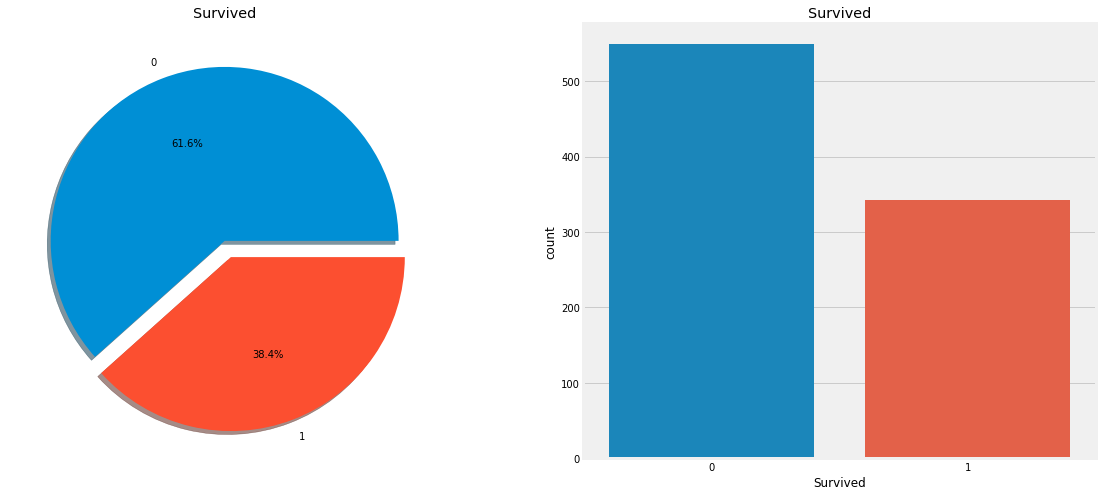

In [100]:
#plotting number of people survived

f,ax=plt.subplots(1,2,figsize=(18,8))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Feature engineering:

Nominal features: Sex, Embarked
ordinal feature: PClass
Contineous feature: Age

In [101]:
#checking survival with respect to sex

df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

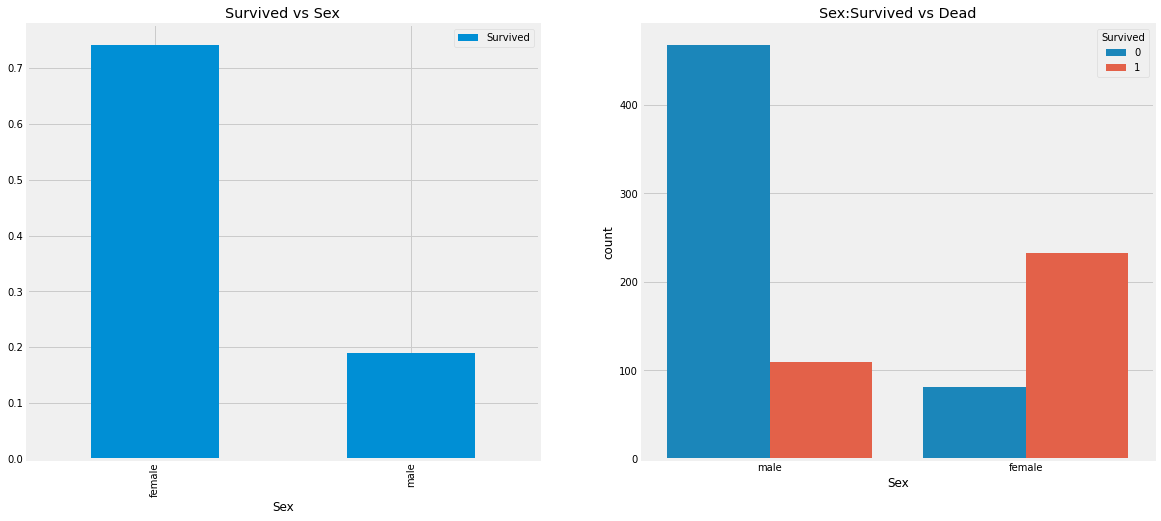

In [102]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

From the above graph we can say that survival of women is much more than men, almost twice

In [103]:
#checking survival with respect to PClass

pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


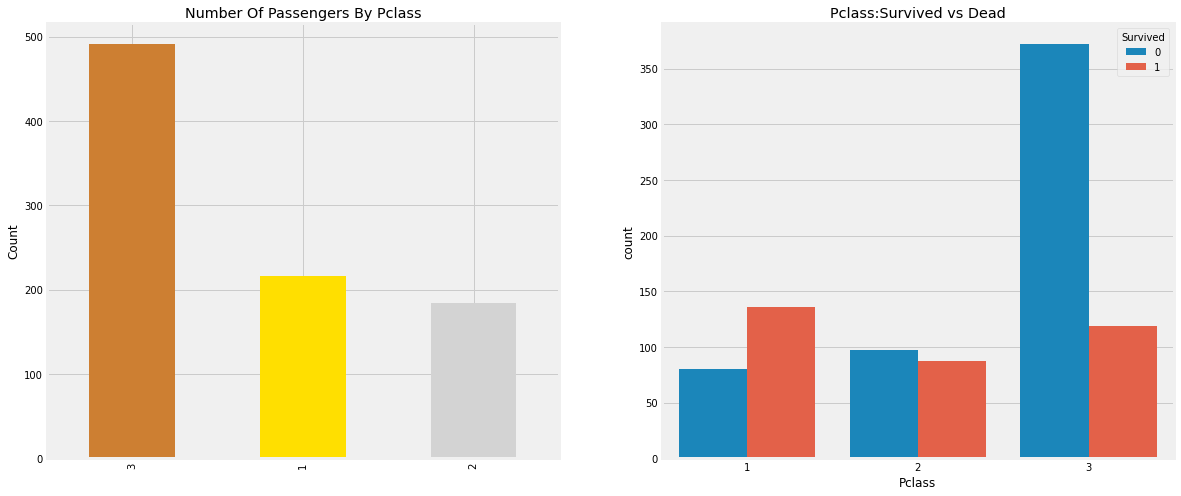

In [104]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

From the above graph, it shows that people from PClass 1 survived more then comes PClass 2 and survival of PClass 3 is less, although passenger in PClass 3 are more.

In [105]:
#checking survival with respect to sex and PClass together

pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

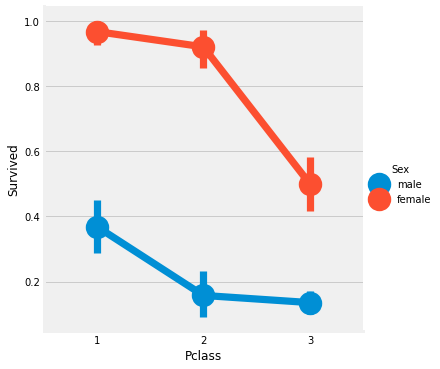

In [106]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)
plt.show()

From the above graph we can say that even in each class female survival is higher. Only 3 female died from PClass 1 which is very high survival followed by PClass 2

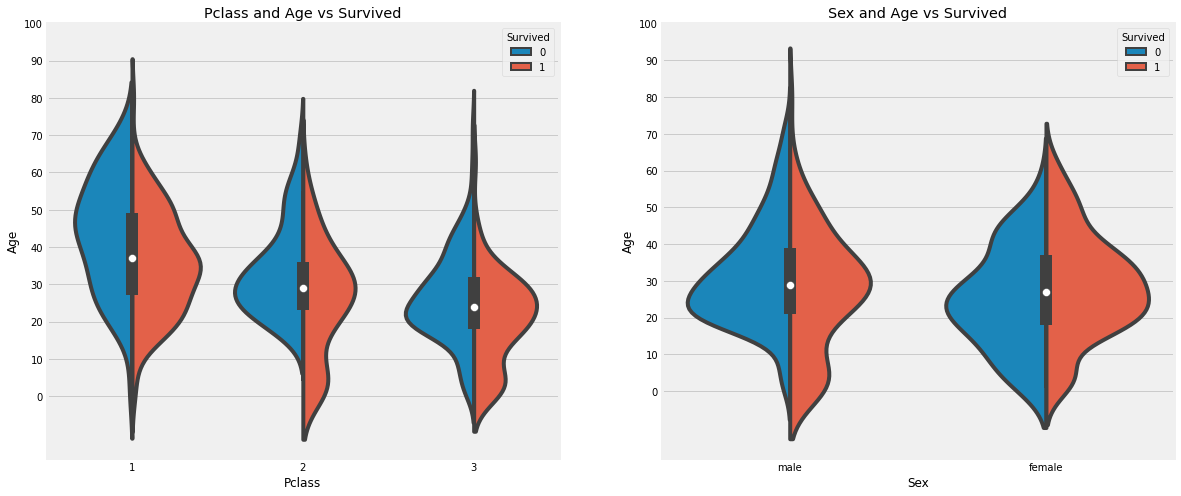

In [107]:
#survival w.r.t Age

f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

From the above graph we can say that survival percentage of younger people is hig, irrespective of class. But with the increase in age of men, survival rate is less.

In [108]:
#Filling null values in Age

Since we cannot replace null values with mean, as a small child cannot be assign a mean age. Hence we will find the initials of a name i.e. salutation and determine the age.

In [109]:
#extracting initials from name
df['Initials'] = 0
for i in df:
  df['Initials']=df.Name.str.extract('([A-Za-z]+)\.')

In [110]:
pd.crosstab(df.Initials,df.Sex).T.style.background_gradient(cmap='summer_r')

Initials,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [111]:
#replacing misspelled intials like Mlle,Mme

df['Initials'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Rev','Sir','Ms'],['Mr','Other','Mrs','Mr','Mr','Other','Mrs','Mr','Miss','Miss','Other','Mr','Miss'],inplace=True)

In [112]:
df['Initials'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initials, dtype: int64

In [113]:
df.groupby('Initials')['Age'].mean()

Initials
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [114]:
#Assigning mean value according to the age

df.loc[(df.Age.isnull())&(df.Initials=='Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.Initials=='Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Initials=='Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Initials=='Mrs'),'Age']=36
df.loc[(df.Age.isnull())&(df.Initials=='Other'),'Age']=46

In [115]:
df.Age.isna().any()

False

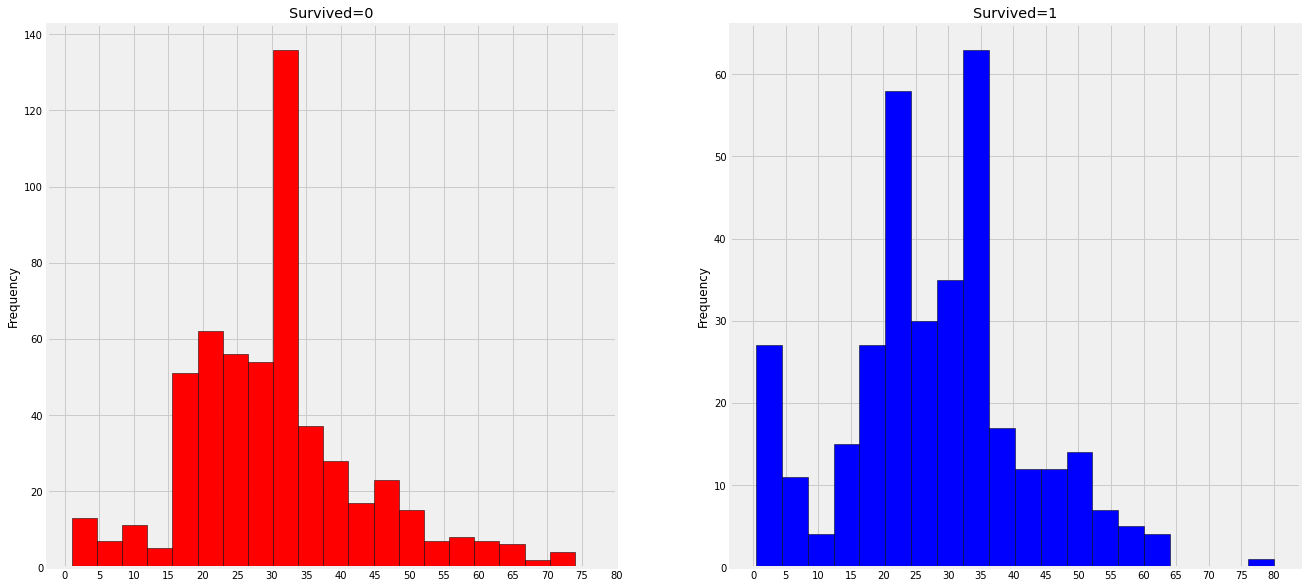

In [116]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='blue')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

From the above graph we can say that survival percentage of youngest passenger is good, even the oldest passenger survived. But death percentage between age range 30-40 is very high.

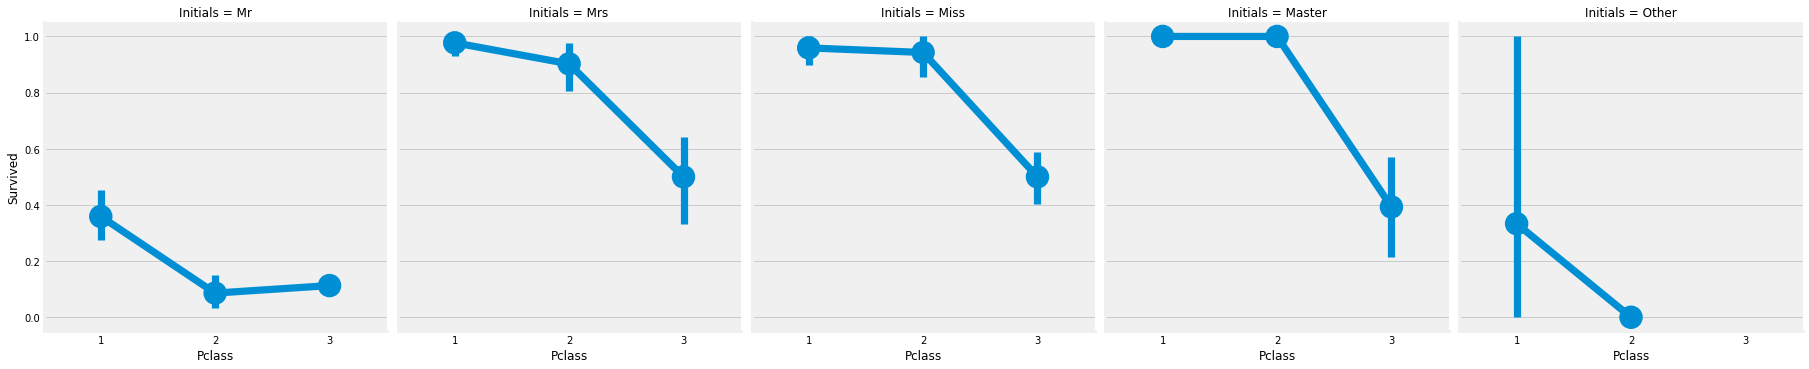

In [117]:
sns.factorplot('Pclass','Survived',col='Initials',data=df)
plt.show()

from the above plot we can determine that irresptive of Age, Pclass 1 has more survival rate. First women and children policy across all Pclass

In [118]:
#Checking survival w.r.t embarked

pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='summer_r')

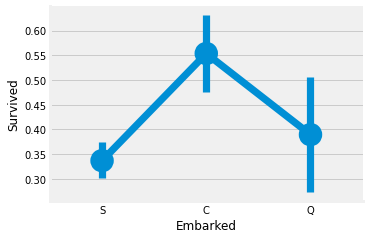

In [119]:
sns.factorplot('Embarked','Survived',data=df)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

From the above plot we can say that chances of survival for passenger who embarked from port c is high and from port s is lowest

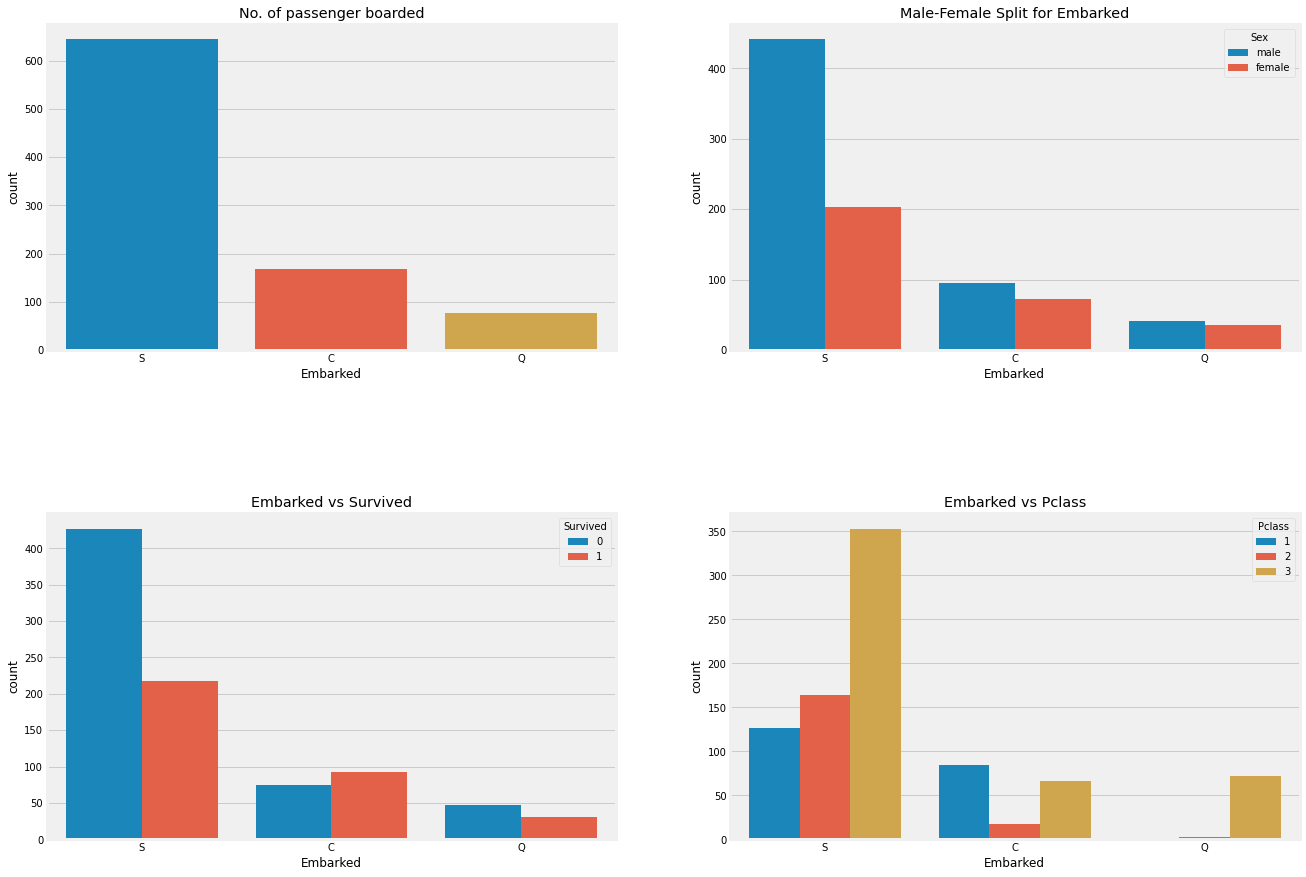

In [120]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df,ax=ax[0,0])
ax[0,0].set_title('No. of passenger boarded')
sns.countplot('Embarked',hue='Sex',data=df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

From the above graph we can say that,
1. Maximum number of people boarded from port S
2. People who embarked from port C has high survival percentage
3. Maximum number of passenger from Pclass 3 boarded from port S. Also 95% of passenger boarded from port Q are from Pclass 3

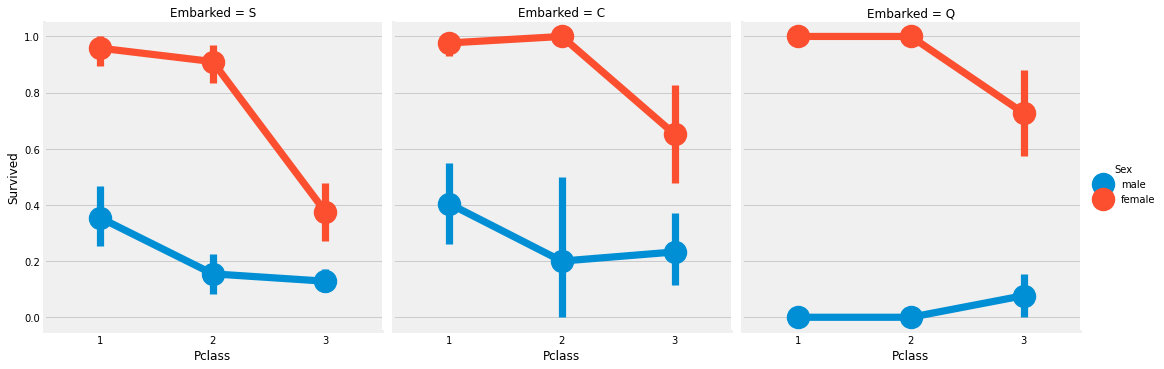

In [121]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=df)
plt.show()

From the above plot we can say that,
1. Female those who embarked from S and belongs to Pclass 3 has lowest survival rate compared to other females.
2. Male those who embarked from C has slightly high survival rate across all class compared to other males
3. Male those who embarked from Q and belongs to Pclass 1 has lowest survival rate. Also survial rate is lowest among males across all Pclass those who embarked from Q. But female survival is high, those who embarked from Q across all class

In [122]:
#Filling null values in embarked

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initials         0
dtype: int64

In [123]:
#we have 2 null values in embarked

df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [124]:
#since number of passenger those who embarked from S is high, we will replace null values with S

df.Embarked.fillna(value='S',inplace=True)

In [125]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initials         0
dtype: int64

In [126]:
#Survival w.r.t SibSp(number of family members/siblings/spouse)

pd.crosstab([df.SibSp],df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


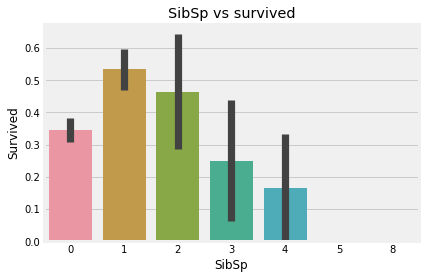

In [127]:
sns.barplot('SibSp','Survived',data=df)
plt.title('SibSp vs survived')
plt.show()

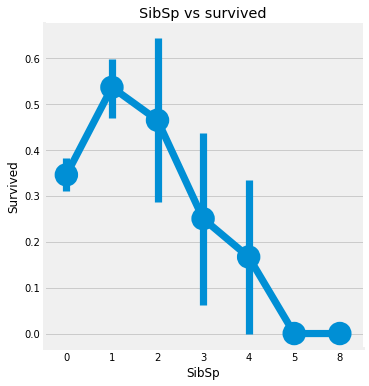

In [128]:
sns.factorplot('SibSp','Survived',data=df)
plt.title('SibSp vs survived')
plt.show()

In [129]:
#Sibsp w.r.t Pclass

pd.crosstab(df.SibSp,df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


From the above plots we can say that,
1. Passenger having one/two sibsp has highest survival rate
2. Passenger having sibsp > 4 has zero survival.
3. Passenger has sibsp > 3 are from Pclass 3, hence it is understood as passenger from Pclass 3 has lowest survival rate.

In [130]:
#checking Parch in each class
pd.crosstab(df.Parch,df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


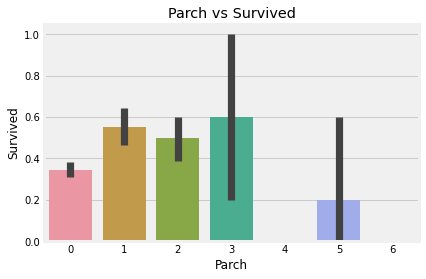

In [131]:
#survival w.r.t parch

sns.barplot('Parch','Survived',data=df)
plt.title("Parch vs Survived")
plt.show()

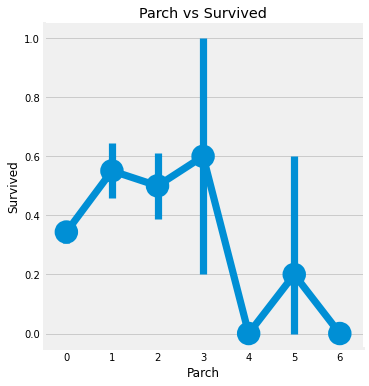

In [132]:
sns.factorplot('Parch','Survived',data=df)
plt.title("Parch vs Survived")
plt.show()

From the above plots we can say that,
1. It is similar to Sibsp, passenger with more than 4 parent/children are from Pclass 3
2. Passenger with 1-3 parent/childern has better chance of survival.

In [133]:
#Analyzing fare

print("Maximum fare: ",df.Fare.max())
print("Mininimum fare: ",df.Fare.min())
print("Average fare: ",df.Fare.mean())

Maximum fare:  512.3292
Mininimum fare:  0.0
Average fare:  32.2042079685746


Text(0.5, 1.0, 'Fare in Pclass 3')

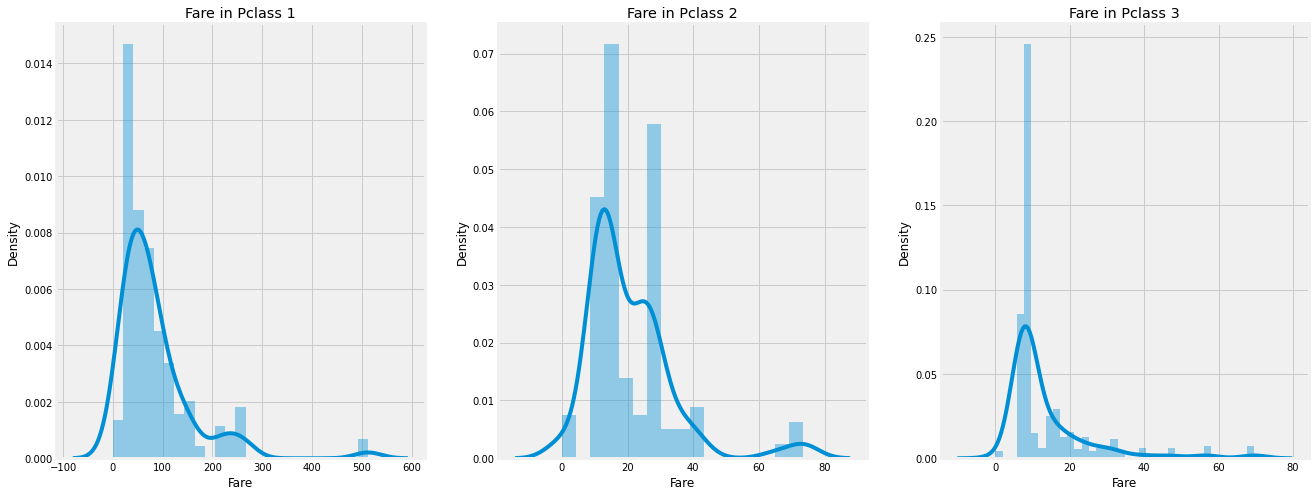

In [134]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(df[df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fare in Pclass 1')
sns.distplot(df[df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fare in Pclass 2')
sns.distplot(df[df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fare in Pclass 3')

From the above analysis we can say that,
1. Pclass 1 fare is very high compared to other class fares
2. Fare is distributed across all class

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Initials     891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


From the above analysis we can say that:
1. Sex: Women has better chance of survival than men
2. Pclass: People from Pclass 1 has better chance of survival then Pclass 2 and at last Pclass 3 which is lowest. Money matters
3. Age: Childern has better chance of survival, passenger ranging from 15 - 35 has highest mortality rate
4. SibSp: Passenger with 1 or 2 siblings or spouse has better chance of survival
5. Parch: Passenger with 2-3 parents or childern has better chance of survival
6. Embarked: Passenger embarked from C has better chance of survival.
7. Most of Pclass 3 passenger embarked from S, hence lowest survival rate.

## **Finding Correlation**

In [136]:
corr = df.corr()
corr*100

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,100.000000,-0.500666,-3.514399,4.170876,-5.752683,-0.165201,1.265822
Survived,-0.500666,100.000000,-33.848104,-9.149738,-3.532250,8.162941,25.730652
Pclass,-3.514399,-33.848104,100.000000,-33.958236,8.308136,1.844267,-54.949962
Age,4.170876,-9.149738,-33.958236,100.000000,-26.773408,-19.871234,8.908670
SibSp,-5.752683,-3.532250,8.308136,-26.773408,100.000000,41.483770,15.965104
Parch,-0.165201,8.162941,1.844267,-19.871234,41.483770,100.000000,21.622494
Fare,1.265822,25.730652,-54.949962,8.908670,15.965104,21.622494,100.000000


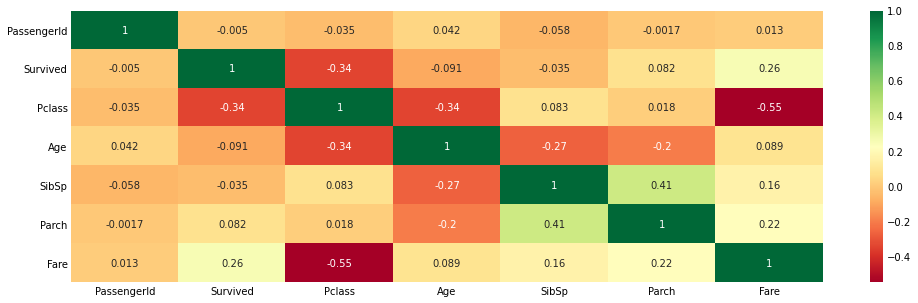

In [137]:
plt.figure(figsize=(15,5))
sns.heatmap(corr,cmap='RdYlGn',vmax=1.0, annot = True)
plt.show()

From the above heatmap we can say that:
1. None of the feature is highly correlated with each other
2. Few of the features are missing as they are not numeric data type.

### **Feature Engineering and Data cleaning**

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Initials     891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [139]:
#converting Sex column to numeric data type
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [140]:
#converting Embarked column to numeric data type
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df.Embarked.value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [141]:
#converting Initials column to numeric data type
df['Initials'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initials, dtype: int64

In [142]:
df['Initials'].replace(['Mr','Miss','Mrs','Master','Other'],[0,1,2,3,4],inplace=True)
df.Initials.value_counts()

0    529
1    186
2    127
3     40
4      9
Name: Initials, dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Initials     891 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB


In [144]:
#Age has contineous data points, so we can convert to age_range and make it categorical

df.Age.max()

80.0

In [145]:
#max age is 80, so we can divide 80/5 then we will have 16 bins in each range

df['Age_Range']=0
df.loc[df['Age']<=16,'Age_Range']=0
df.loc[(df['Age']>16)&(df['Age']<=32),'Age_Range']=1
df.loc[(df['Age']>32)&(df['Age']<=48),'Age_Range']=2
df.loc[(df['Age']>48)&(df['Age']<=64),'Age_Range']=3
df.loc[(df['Age']>64)&(df['Age']<=80),'Age_Range']=4


In [146]:
df['Age_Range'].value_counts()

1    382
2    325
0    104
3     69
4     11
Name: Age_Range, dtype: int64

In [147]:
df['Family_Size']=0
df['Family_Size']=df['Parch']+df['SibSp']#family size
df['Alone']=0
df.loc[df.Family_Size==0,'Alone']=1



In [148]:
df['Family_Size'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_Size, dtype: int64

In [149]:
df['Alone'].value_counts()

1    537
0    354
Name: Alone, dtype: int64

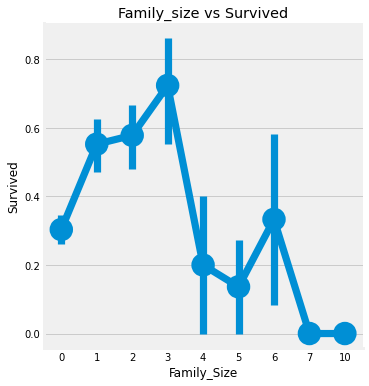

In [150]:
sns.factorplot('Family_Size','Survived',data=df)
plt.title("Family_size vs Survived")
plt.show()

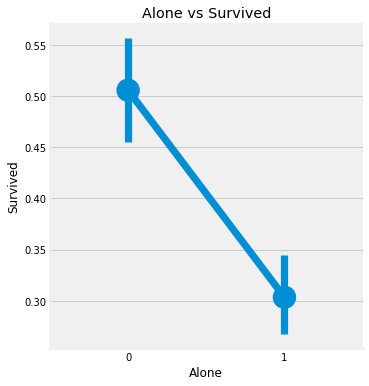

In [151]:
sns.factorplot('Alone','Survived',data=df)
plt.title("Alone vs Survived")
plt.show()

From the above graph we can say that :
1. passenger with 1-3 family size has better survival rate, even a lone passenger has lower survival rate.
2. Passenger with more than 4 family size has lowest survial rate. survival rate decreases with the increase in family size.
3. Alone passenger has low survival rate compared to passenger with family members.


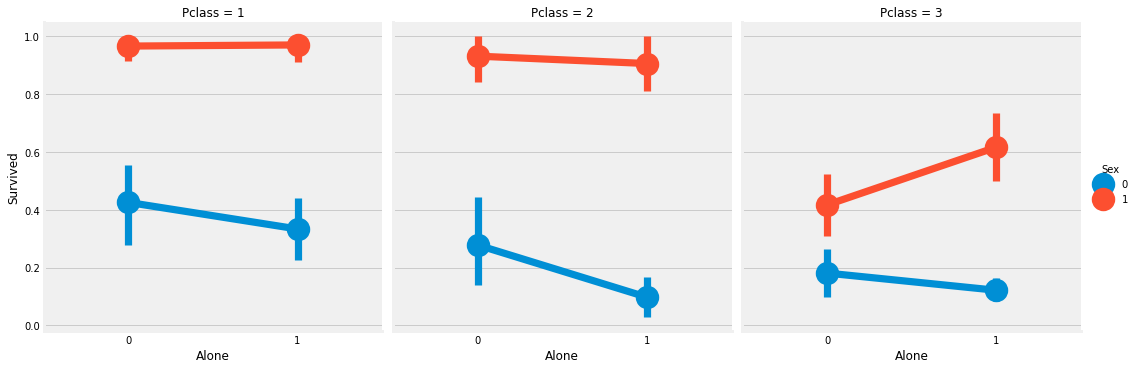

In [152]:
sns.factorplot('Alone','Survived',data=df,hue='Sex',col='Pclass')
plt.show()

From the above graph we can say that women from Pclass 3, who are alone has better survival rate than with family. But it is not in the case with other class

In [153]:
#Now converting Fare into categorical data
#First we will divide it with 4 equal range

df['Fare_Range']=pd.qcut(df['Fare'],4)

In [154]:
df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [155]:
#now we will categorize all the 4 range, similar to age range

df['Fare_band']=0
df.loc[df['Fare']<=7.91,'Fare_band']=0
df.loc[(df['Fare']>7.91)&(df['Fare']<=14.454),'Fare_band']=1
df.loc[(df['Fare']>14.454)&(df['Fare']<=31.0),'Fare_band']=2
df.loc[(df['Fare']>31.0)&(df['Fare']<=512.329),'Fare_band']=3


In [156]:
df['Fare_band'].value_counts()

2    229
0    226
3    219
1    217
Name: Fare_band, dtype: int64

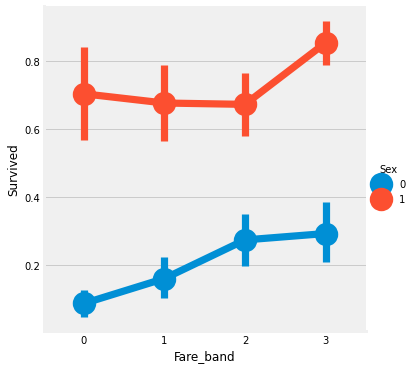

In [157]:
sns.factorplot('Fare_band','Survived',data=df,hue='Sex')
plt.show()

From the above plot we can say that irrespective of gender, survival chances increases with the increase in fare.

### Now removing unwanted features from data set

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    int64   
 12  Initials     891 non-null    int64   
 13  Age_Range    891 non-null    int64   
 14  Family_Size  891 non-null    int64   
 15  Alone        891 non-null    int64   
 16  Fare_Range   891 non-null    category
 17  Fare_band    891 non-null    int64   
dtypes: category(1), float64(2), in

In [159]:
#we can drop PassengerID,Name,Ticket,cabin(as it has large number of null values),Age(we have Age_Range which is categorical),Fare_Range(we have fare_band),Fare(we have Fare_band which is converted to categorical)

df.drop(['PassengerId','Name','Ticket','Fare','Cabin','Fare_Range','Age'],axis=1,inplace=True)

In [160]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initials,Age_Range,Family_Size,Alone,Fare_band
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,2,2,1,0,3
2,1,3,1,0,0,0,1,1,0,1,1
3,1,1,1,1,0,0,2,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


### Plotting heat to check correlation

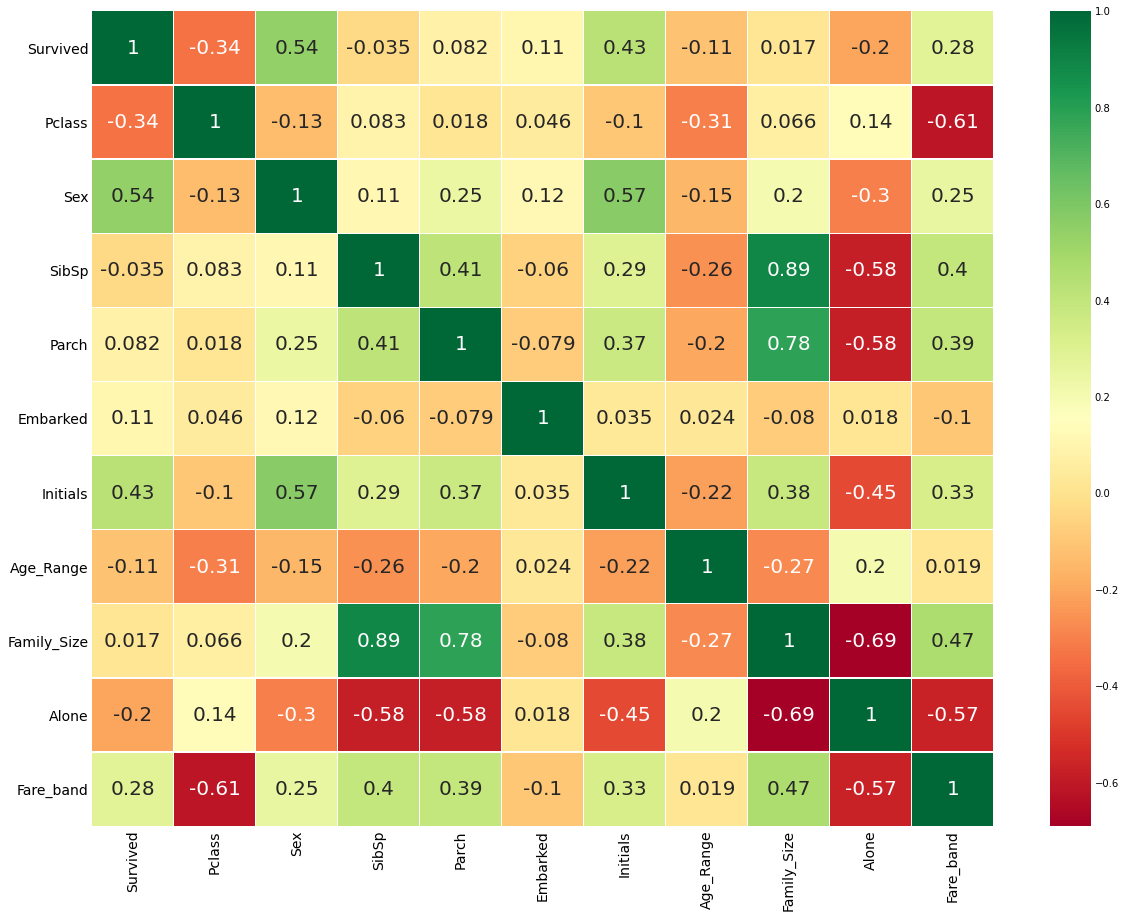

In [161]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

From the above correlation heatmap we can say that:
1. Family_size is highly correlated with SibSp and Parch
2. Fare_band is inversly related to PClass

# Predictive analysis unsing ML models:

1. KNN model
2. Logistic Regression model
3. Naive Baye's

In [162]:
#Considering features for independent and dependent variables, X will be independent and y will be dependent variable

X = df.drop(['Survived','SibSp'],axis=1)
y = df[['Survived']]

In [163]:
#splitting train and test data in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [164]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 9)
(268, 9)
(623, 1)
(268, 1)


## KNN Model

In [165]:
#fitting the data in KNN classification model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [166]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [167]:
#prediction with respect to X_test data
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0])

In [168]:
#checking score between X_test and y_test data
knn.score(X_test,y_test)*100

77.98507462686567

In [169]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

77.98507462686567

In [170]:
#checking score between X_train and y_train data
knn.score(X_train,y_train)

0.8571428571428571

In [171]:
#Calculating confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
cf1 = confusion_matrix(y_test,y_pred)
cf1

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       153
           1       0.84      0.60      0.70       115

    accuracy                           0.78       268
   macro avg       0.80      0.76      0.76       268
weighted avg       0.79      0.78      0.77       268



array([[140,  13],
       [ 46,  69]])

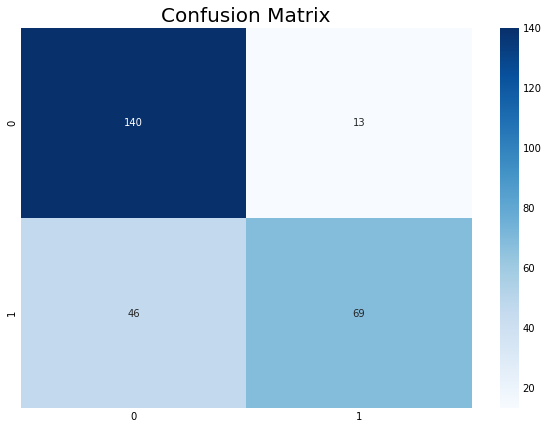

In [172]:
#Plotting confusion matrix
plt.figure(figsize=(9,7))
plt.title('Confusion Matrix',fontsize=20)
sns.heatmap(cf1,cmap='Blues',annot=True,fmt='g')

## Logistic Regression Model

In [173]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [174]:
#fitting the x_train and y_train data in logistic regression model
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [175]:
#Finding prediction value of y with respect to X_test data
pred = LR.predict(X_test)
pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0])

In [176]:
#calculating accuracy score between y_test and prediction data w.r.t logistic regression
accuracy_score(y_test,pred)*100

79.47761194029852

In [177]:
#Calculating confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
cf = confusion_matrix(y_test,pred)
cf

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       153
           1       0.79      0.70      0.75       115

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268



array([[132,  21],
       [ 34,  81]])

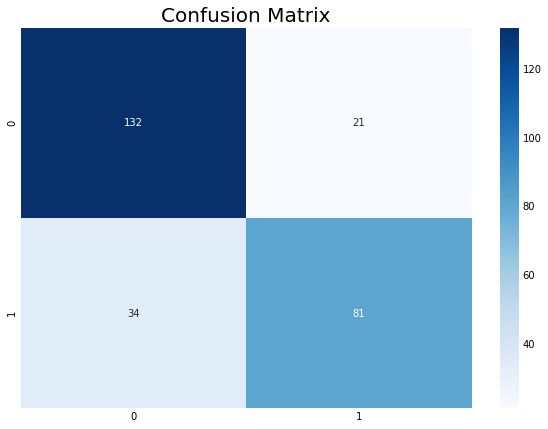

In [178]:
#Plotting confusion matrix
plt.figure(figsize=(9,7))
plt.title('Confusion Matrix',fontsize=20)
sns.heatmap(cf,cmap='Blues',annot=True,fmt='g')

## Naive Baye's Model

In [179]:
from sklearn.naive_bayes import GaussianNB

In [180]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [181]:
prd = model.predict(X_test)
prd

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1])

In [182]:
accuracy_score(y_test,prd)*100

75.0

In [183]:
#Calculating confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prd))
cf2 = confusion_matrix(y_test,prd)
cf2

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       153
           1       0.70      0.72      0.71       115

    accuracy                           0.75       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.75      0.75      0.75       268



array([[118,  35],
       [ 32,  83]])

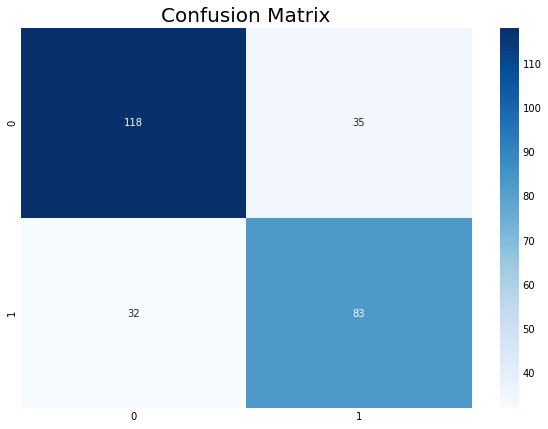

In [184]:
#Plotting confusion matrix
plt.figure(figsize=(9,7))
plt.title('Confusion Matrix',fontsize=20)
sns.heatmap(cf2,cmap='Blues',annot=True,fmt='g')

## Summary

1. Logistic regression gives better fit with accuracy score of 79.4%
2. Dropping of column 'SibSp' from independent variable gives better accuracy score of 77% for KNN model, compared to before with accuracy of 76% with 'SibSp'

Improvent:
1. We can get better accuracy using various optimization technique, which we will do in later part of our project.